### Data Importing and Preprocessing

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<Axes: xlabel='Outcome', ylabel='count'>

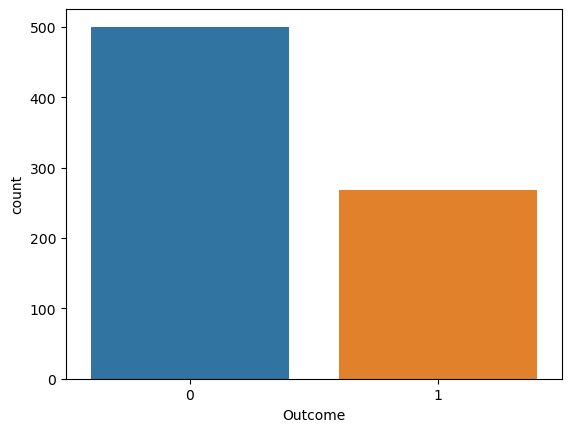

In [47]:
sns.countplot(x=df.Outcome)

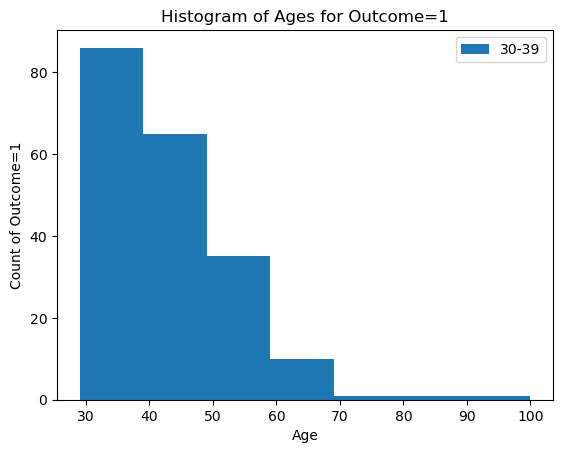

In [48]:
plt.hist(df[df['Outcome']==1]['Age'],bins=[29, 39, 49, 59, 69, 100],label=['30-39', '40-49', '50-59', '60-69', '70+'])
plt.xlabel('Age')
plt.ylabel('Count of Outcome=1')
plt.title('Histogram of Ages for Outcome=1')
plt.legend()
plt.show()

Text(0, 0.5, 'Count')

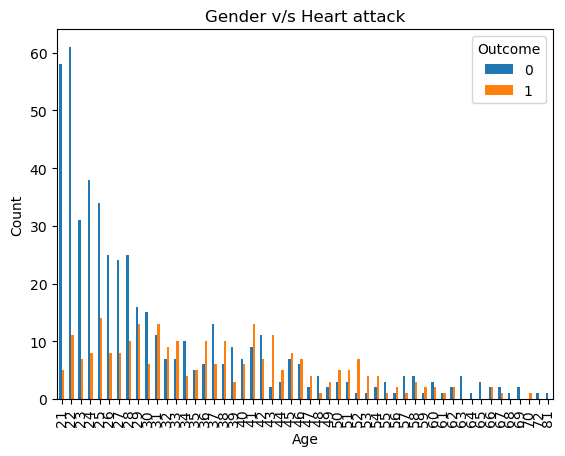

In [59]:
data=df.groupby(['Age','Outcome']).size().unstack()
ax=data.plot(kind='bar')
plt.title('Gender v/s Heart attack')
#plt.xlabel('Gender')
#plt.xticks(ticks=[0,1],labels=['Female','Male'])
plt.ylabel('Count')

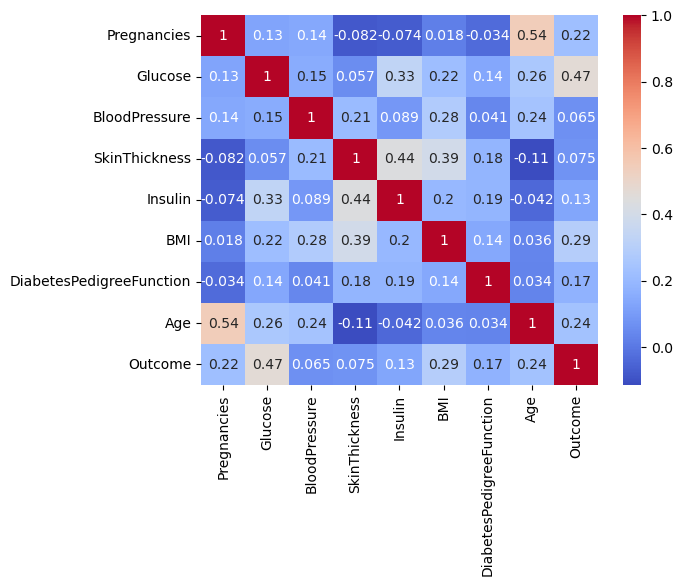

In [27]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

### Fit the Model

In [16]:
x=df.iloc[:,0:8].values
y=df.iloc[:,-1].values

In [17]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25,random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred = classifier.predict(x_test)

### Model Evaluation

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[115  25]
 [ 15  37]]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       140
           1       0.60      0.71      0.65        52

    accuracy                           0.79       192
   macro avg       0.74      0.77      0.75       192
weighted avg       0.81      0.79      0.80       192

